# Proyecto Integrador IV
> E-Commerce Data Pipeline

En este notebook, primero ejecutaremos todos los componentes de nuestro pipeline ELT y luego realizaremos visualizaciones con la información resultante


In [1]:
# Importing the necessary libraries
from pandas import DataFrame
from sqlalchemy import create_engine
from typing import Dict
from pathlib import Path

from src.transform import QueryEnum
from src import config
from src.transform import run_queries
from src.extract import extract
from src.load import load
from src.plots import (
    plot_freight_value_weight_relationship,
    plot_global_amount_order_status,
    plot_real_vs_predicted_delivered_time,
    plot_revenue_by_month_year,
    plot_revenue_per_state,
    plot_top_10_least_revenue_categories,
    plot_top_10_revenue_categories,
    plot_top_10_revenue_categories_ammount,
    plot_delivery_date_difference,
    plot_order_amount_per_day_with_holidays,
)

In [2]:
print(config.SQLITE_BD_ABSOLUTE_PATH)

c:\Users\maria\Desktop\proyecto_integrador_IV_2\olist.db


In [3]:
# Create the database sql file
Path(config.SQLITE_BD_ABSOLUTE_PATH).touch()

# Create the database connection
ENGINE = create_engine(rf"sqlite:///c:\Users\maria\Downloads\proyecto_integrador_IV_2\olist.db", echo=False)

### 1. Extract

Aquí estarás extrayendo la información de las fuentes.

In [4]:
import os
from src.extract import extract  # Asegúrate de que la función extract esté correctamente importada

# Verifica si las rutas y configuraciones están correctas
csv_folder = config.DATASET_ROOT_PATH
print("CSV Folder Path:", csv_folder)

public_holidays_url = config.PUBLIC_HOLIDAYS_URL
print("Public Holidays URL:", public_holidays_url)

# 1. Get the mapping of the csv files to the table names.
csv_table_mapping = config.get_csv_to_table_mapping()
print("CSV Table Mapping:", csv_table_mapping)

# Verifica si los archivos CSV existen en las rutas correspondientes
for csv_file in csv_table_mapping.keys():
    file_path = os.path.join(csv_folder, csv_file)
    print(file_path)
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"No such file or directory: '{file_path}'")
    
# 2. Extract the data from the csv files, holidays and load them into the dataframes.
csv_dataframes = extract(csv_folder, csv_table_mapping, public_holidays_url)


CSV Folder Path: c:\Users\maria\Desktop\proyecto_integrador_IV_2\dataset
Public Holidays URL: https://date.nager.at/api/v3/publicholidays
CSV Table Mapping: {'olist_customers_dataset.csv': 'olist_customers', 'olist_geolocation_dataset.csv': 'olist_geolocation', 'olist_order_items_dataset.csv': 'olist_order_items', 'olist_order_payments_dataset.csv': 'olist_order_payments', 'olist_order_reviews_dataset.csv': 'olist_order_reviews', 'olist_orders_dataset.csv': 'olist_orders', 'olist_products_dataset.csv': 'olist_products', 'olist_sellers_dataset.csv': 'olist_sellers', 'product_category_name_translation.csv': 'product_category_name_translation'}
c:\Users\maria\Desktop\proyecto_integrador_IV_2\dataset\olist_customers_dataset.csv


FileNotFoundError: No such file or directory: 'c:\Users\maria\Desktop\proyecto_integrador_IV_2\dataset\olist_customers_dataset.csv'

### 2. Load

Usando los diferentes conjuntos de datos proporcionados, almacenarás todo en nuestro Data Warehouse.

In [ ]:
load(data_frames=csv_dataframes, database=ENGINE)

DataFrame 'olist_customers' loaded successfully into the database.
DataFrame 'olist_geolocation' loaded successfully into the database.
DataFrame 'olist_order_items' loaded successfully into the database.
DataFrame 'olist_order_payments' loaded successfully into the database.
DataFrame 'olist_order_reviews' loaded successfully into the database.
DataFrame 'olist_orders' loaded successfully into the database.
DataFrame 'olist_products' loaded successfully into the database.
DataFrame 'olist_sellers' loaded successfully into the database.
DataFrame 'product_category_name_translation' loaded successfully into the database.
DataFrame 'public_holidays' loaded successfully into the database.


### 3. Transform

Aquí transformarás las diferentes consultas en tablas. Hay dos secciones: una con las consultas relacionadas con los ingresos y otra con las consultas relacionadas con las entregas.

##### 3.1 Queries sobre ingresos

In [ ]:
query_results: Dict[str, DataFrame] = run_queries(database=ENGINE)

In [ ]:
# Transforming the revenue_by_month_year query to a table
revenue_by_month_year = query_results[QueryEnum.REVENUE_BY_MONTH_YEAR.value]
revenue_by_month_year

,month_no,month,Year2016,Year2017,Year2018
0,01,Ene,0.00,138488.04,1115004.18
1,02,Feb,0.00,291908.01,992463.34
2,03,Mar,0.00,449863.60,1159652.12
3,04,Abr,0.00,417788.03,1160785.48
4,05,May,0.00,592918.82,1153982.15
5,06,Jun,0.00,511276.38,1023880.50
6,07,Jul,0.00,592382.92,1066540.75
7,08,Ago,0.00,674396.32,1022425.32
8,09,Sep,252.24,727762.45,4439.54
9,10,Oct,59090.48,779677.88,589.67


In [ ]:
# Transforming the top_10_revenue_categories query to a table
top_10_revenue_categories = query_results[QueryEnum.TOP_10_REVENUE_CATEGORIES.value]
top_10_revenue_categories

,Category,Num_order,Revenue
0,cama_mesa_banho,9272,1692714.28
1,beleza_saude,8646,1620684.04
2,informatica_acessorios,6529,1549252.47
3,moveis_decoracao,6307,1394466.93
4,relogios_presentes,5493,1387046.31
5,esporte_lazer,7529,1349252.93
6,utilidades_domesticas,5743,1069787.97
7,automotivo,3809,833610.84
8,ferramentas_jardim,3448,810614.93
9,cool_stuff,3559,744649.32


In [ ]:
# Transforming the top_10_least_revenue_categories query to a table
top_10_least_revenue_categories = query_results[
    QueryEnum.TOP_10_LEAST_REVENUE_CATEGORIES.value
]
top_10_least_revenue_categories

,Category,Revenue
0,seguros_e_servicos,324.51
1,fashion_roupa_infanto_juvenil,785.67
2,cds_dvds_musicais,1199.43
3,casa_conforto_2,1710.54
4,flores,2213.01
5,artes_e_artesanato,2326.17
6,la_cuisine,2913.53
7,fashion_esporte,3645.92
8,fraldas_higiene,4221.25
9,fashion_roupa_feminina,5109.62


In [ ]:
# Transforming the revenue_per_state query to a table
revenue_per_state = query_results[QueryEnum.REVENUE_PER_STATE.value]
revenue_per_state

,customer_state,Revenue
0,SP,5770266.19
1,RJ,2055690.45
2,MG,1819277.61
3,RS,861802.40
4,PR,781919.55
5,SC,595208.40
6,BA,591270.60
7,DF,346146.17
8,GO,334294.22
9,ES,317682.65


##### 3.2 Queries sobre entregas

In [ ]:
# Transforming the delivery_date_difference query to a table
delivery_date_difference = query_results[QueryEnum.DELIVERY_DATE_DIFFERECE.value]
delivery_date_difference

,State,Delivery_Difference
0,AL,-8.032059
1,MA,-8.887844
2,SE,-9.328641
3,ES,-9.797109
4,BA,-10.099073
5,CE,-10.110007
6,MS,-10.355558
7,SP,-10.380350
8,PI,-10.629538
9,SC,-10.801736


In [ ]:
# Transforming the real vs predicted delivered time query to a table per month and year
real_vs_estimated_delivered_time = query_results[
    QueryEnum.REAL_VS_ESTIMATED_DELIVERED_TIME.value
]
real_vs_estimated_delivered_time

,month_no,month,Year2016_real_time,Year2017_real_time,Year2018_real_time,Year2016_estimated_time,Year2017_estimated_time,Year2018_estimated_time
0,01,Ene,NaN,12.647044,14.080563,NaN,39.508831,26.302555
1,02,Feb,NaN,13.168825,16.945138,NaN,31.848929,24.528996
2,03,Mar,NaN,12.951184,16.301410,NaN,24.732386,22.033067
3,04,Abr,NaN,14.917913,11.499241,NaN,27.349810,23.679546
4,05,May,NaN,11.322363,11.419029,NaN,24.284784,22.891488
5,06,Jun,NaN,12.011573,9.239216,NaN,24.021864,27.772740
6,07,Jul,NaN,11.592732,8.958636,NaN,23.317316,19.690127
7,08,Ago,NaN,11.147125,7.732780,NaN,23.480603,15.186330
8,09,Sep,54.813194,11.851007,NaN,18.488449,22.437366,NaN
9,10,Oct,19.600559,11.856700,NaN,55.676632,23.019536,NaN


In [ ]:
# Transforming the global ammount of order status query to a table
global_ammount_order_status = query_results[QueryEnum.GLOBAL_AMMOUNT_ORDER_STATUS.value]
global_ammount_order_status

,order_status,Ammount
0,approved,2
1,canceled,625
2,created,5
3,delivered,96478
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


In [ ]:
orders_per_day_and_holidays = query_results[
    QueryEnum.ORDERS_PER_DAY_AND_HOLIDAYS_2017.value
]
orders_per_day_and_holidays

,order_count,date,holiday
order_purchase_timestamp,,,
2017-01-05,32,2017-01-05,False
2017-01-06,4,2017-01-06,False
2017-01-07,4,2017-01-07,False
2017-01-08,6,2017-01-08,False
2017-01-09,5,2017-01-09,False
...,...,...,...
2017-12-27,167,2017-12-27,False
2017-12-28,146,2017-12-28,False
2017-12-29,135,2017-12-29,False


In [ ]:
freight_value_weight_relationship = query_results[
    QueryEnum.GET_FREIGHT_VALUE_WEIGHT_RELATIONSHIP.value
]

### 4. Graficas de las tablas resultantes

Ahora, crearemos gráficos a partir de las diferentes consultas.

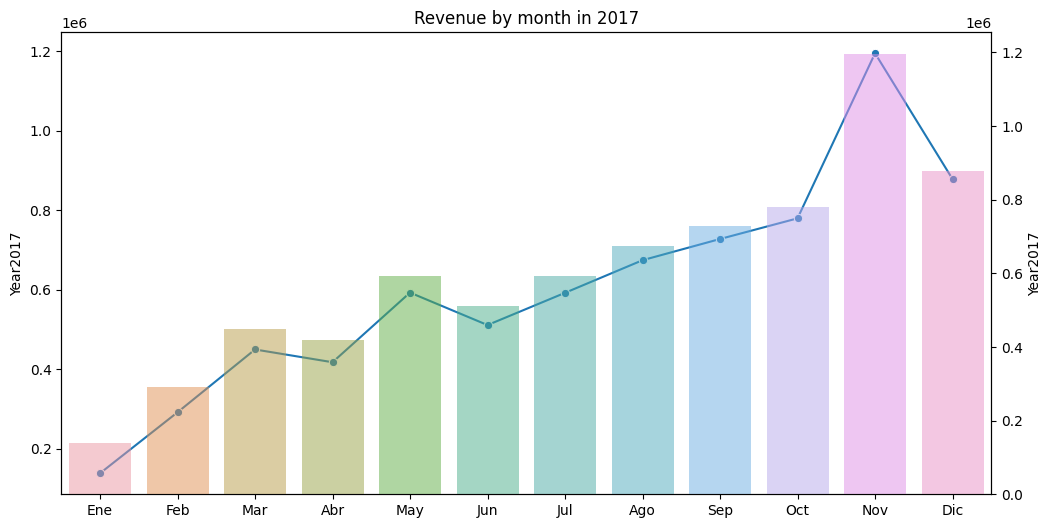

In [ ]:
plot_revenue_by_month_year(revenue_by_month_year, 2017)

In [ ]:
import plotly.express as px
import pandas as pd
from src.transform import QueryEnum, run_queries # Asegúrate de que tu ruta sea correcta
##from sqlalchemy import create_engine

# Asumiendo que 'database' es tu conexión a la base de datos
query_results = run_queries(ENGINE)
##Establecer la conexión a la base de datos
##ENGINE = create_engine(rf"sqlite:///c:\Users\maria\Downloads\proyecto_integrador_IV_2\olist.db", echo=False)

# Ejecutar las consultas
##query_results = run_queries(ENGINE)

def plot_top_10_revenue_categories(df: pd.DataFrame):
    """Plot top 10 revenue categories

    Args:
        df (pd.DataFrame): Dataframe with top 10 revenue categories query result
    """
    fig = px.treemap(df, path=["Category"], values="Revenue", width=800, height=400)
    fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
    fig.show()

# Obtener los datos de la consulta
top_10_revenue_categories = query_results[QueryEnum.TOP_10_REVENUE_CATEGORIES.value]

# Llamar a la función para graficar
print(top_10_revenue_categories.columns)
plot_top_10_revenue_categories(top_10_revenue_categories)

Index(['Category', 'Num_order', 'Revenue'], dtype='object')


In [ ]:
plot_top_10_revenue_categories(top_10_revenue_categories)

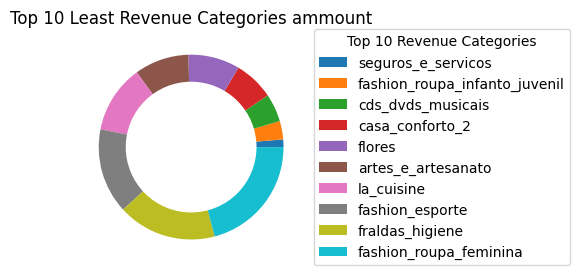

In [ ]:
plot_top_10_least_revenue_categories(top_10_least_revenue_categories)

In [ ]:
plot_revenue_per_state(revenue_per_state)

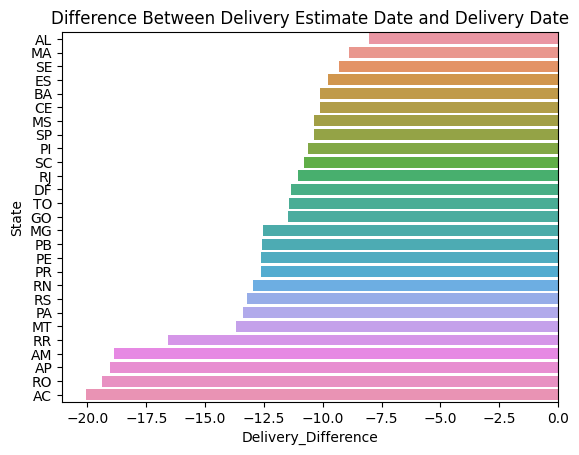

In [ ]:
plot_delivery_date_difference(delivery_date_difference)

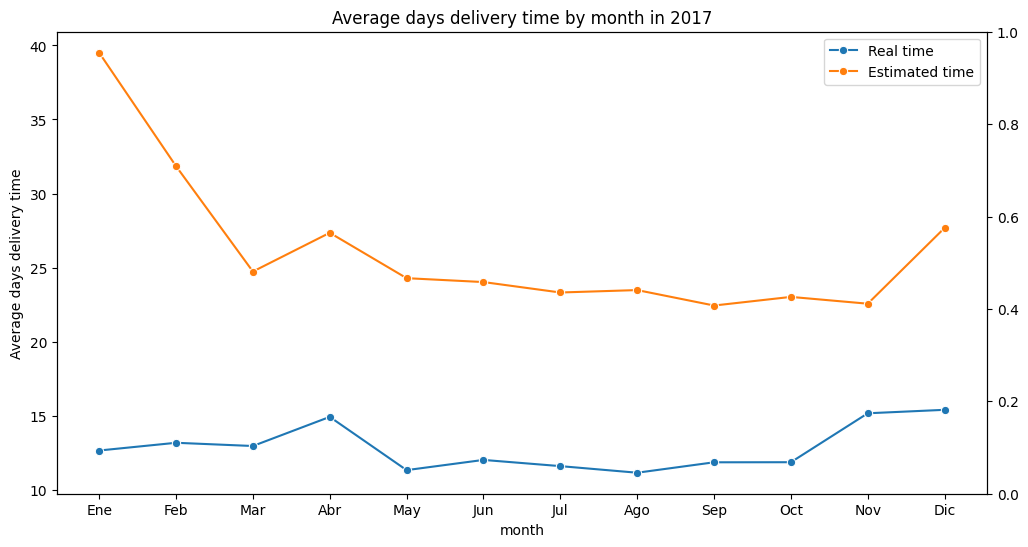

In [ ]:
plot_real_vs_predicted_delivered_time(real_vs_estimated_delivered_time, year=2017)

  order_status  Ammount
0     approved        2
1     canceled      625
2      created        5
3    delivered    96478
4     invoiced      314
5   processing      301
6      shipped     1107
7  unavailable      609


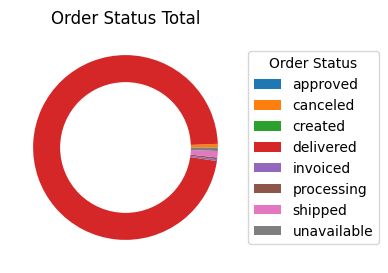

In [ ]:
print(global_ammount_order_status)
plot_global_amount_order_status(global_ammount_order_status)

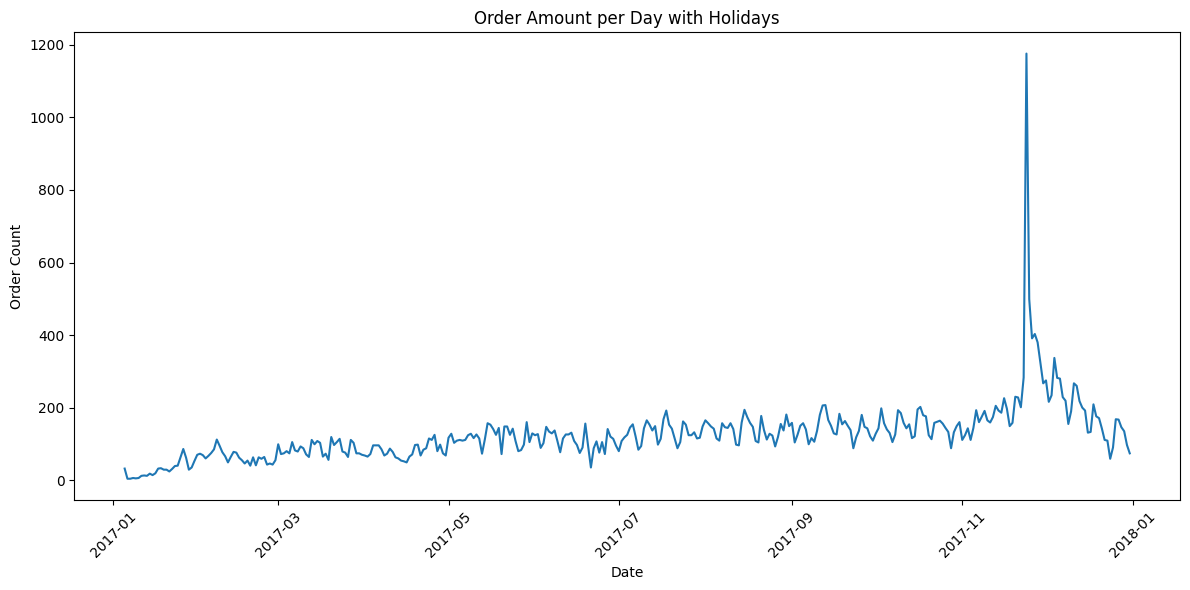

In [ ]:
plot_order_amount_per_day_with_holidays(orders_per_day_and_holidays)

El gráfico de Pedidos por Día y Días Festivos que programarás en **src/plots.py** debe ser similar a este:

![The plot you will code will be similar to this:](images/orders_per_day_and_holidays.png "Orders per Day and Holidays")

4.1 ¿Ves alguna relación entre los días festivos en Brasil durante 2017 y las compras de ese año?

Respuesta: No se observa una relación clara entre los días festivos y la cantidad de compras, los días festivos tradicionales no parecen tener una influencia significativa en la cantidad de compras en Brasil durante 2017.
No se identifican picos o valles significativos en la cantidad de pedidos que coinciden con los días festivos, lo que sugiere que estos días no tuvieron un impacto notable en las compras.
Sin embargo, se observa un pico masivo en la cantidad de pedidos hacia finales de noviembre y principios de diciembre. Este pico podría estar relacionado con el "Black Friday" y las compras navideñas, lo que indica que estos eventos tienen un impacto mucho mayor en las compras que los días festivos tradicionales.

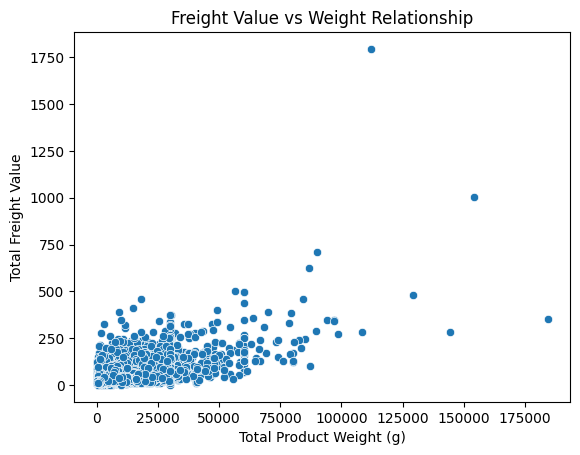

In [ ]:
plot_freight_value_weight_relationship(freight_value_weight_relationship)

El gráfico sobre la relación entre el valor del flete y el peso del producto que debes programar en `src/plots.py` tiene que ser similar a este:

![The plot you will code will be similar to this:](images/freight_value_weight_relationship.png "Freight Value and Weight Relationship")

4.2 ¿Ves alguna correlación entre el valor del flete y el peso del producto?

Respuesta: Sí, se observa una correlación positiva fuerte entre el valor del flete y el peso del producto, especialmente en el rango de peso de 0 a 60,000 gramos y valores de flete de 0 a 250 reales brasileños (R$). Dentro de este rango, a medida que el peso del producto aumenta, el valor del flete también tiende a incrementarse de manera significativa.
Sin embargo, más allá de estos rangos, la correlación se debilita. Para valores de flete superiores a 250 R$ y pesos que exceden los 60,000 gramos, la cantidad de puntos de datos disminuye considerablemente. Específicamente, hay muy pocos pedidos con valores de flete superiores a 500 R$, y solo cuatro productos registran pesos extremadamente altos (126,000, 149,000, 160,000 y 180,000 gramos). De igual forma, solo existen cuatro pedidos con valores de flete muy elevados por encima de los 500, siendo 600, 750, 1000 y 1750 el valor maximo.
Estos valores atípicos sugieren que, aunque existe una tendencia general de correlación positiva, otros factores podrían influir en el valor del flete para pedidos con pesos y valores extremadamente altos. Estos factores podrían incluir la distancia de envío, el tipo de producto o servicios de envío especiales.